# Проект: Статистический анализ данных

**Переданы данные популярного сервиса аренды самокатов GoFast о некоторых пользователях из нескольких городов, а также об их поездках. Необходимо проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.**

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться как с подпиской, так и без. Условия следующие: 
 
 - без подписки
  - абонентская плата отсутствует;
  - стоимость одной минуты поездки — 8 рублей;
  - стоимость старта (начала поездки) — 50 рублей;
 
 - с подпиской Ultra
  - абонентская плата — 199 рублей в месяц;
  - стоимость одной минуты поездки — 6 рублей;
  - стоимость старта — бесплатно.

**В основных данных есть информация о пользователях, их поездках и подписках:**
 - пользователи (файл users_go.csv содержит уникальный идентификатор пользователя (user_id), имя пользователя(name), возраст(age), город(city), тип подписки (free, ultra));
 - поездки (файл rides_go.csv содержит  уникальный идентификатор пользователя, расстояние(distance), которое пользователь проехал в текущей сессии (в метрах), продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»(duration), дата совершения поездки(date)
 - подписки (файл subscriptions_go.csv содержит тип подписки, стоимостью одной минуты поездки по данной подписке(minute_price),стоимостью начала поездки (start_ride_price), стоимость ежемесячного платежа (subscription_fee)
 
**В данном проекте будет решена следующая задача:**
 - анализ данных,проверка ряда гипотез и выдвижение рекомендаций, которые помогут бизнесу вырасти.

**Описание хода исследования:**
 - изучение общей информации о данных,
 - предобработка данных,
 - исследовательский анализ,
 - объединение данных,
 - агрегированние данных по пользователям и месяцам, по наличию/отсутствию подписки,
 - проверка гипотез,
 - общий вывод по проекту.

In [1]:
#импортируем необходимые библиотеки,отключим предупреждения(в конце), зададим формат вывода знаков после запятой
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format

## Загрузка данных

Загрузим данные из каждого файла с пользователями,подписками и поездками и сохраним их в свой датафрейм

In [2]:
# функция загрузки данных из файлов
def download(file):
    data = pd.DataFrame()

    path_1 = '/datasets/' + file + '.csv'
    path_2 = 'https://code.s3.yandex.net/datasets/' + file + '.csv'
   
    if os.path.exists(path_1):
        data = pd.read_csv(path_1, sep=',')
    elif os.path.exists(path_2):
        data = pd.read_csv(path_2, sep=',')
    
    return data

In [3]:
#загрузим данные из файла users_go.csv
users = download('users_go')

#загрузим данные из файла rides_go.csv
rides = download('rides_go')

#загрузим данные из файла subscriptions_go.csv
subscriptions = download('subscriptions_go')


Выведем первые строки каждого набора данных и  изучим общую информацию о каждом датафрейме.
Начнем с данных о пользователях

In [4]:
#выведем первые 5 строк
users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [5]:
#выведем общую информацию
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


Файл с пользователями:
 - данные состоят из 1565 строк, 
 - пропусков нет (в каждом стобце кол-во значений равно кол-ву строк),
 - столбцы с уникальным идентификатором пользователя (номер по порядку) и возрастом имеют целочисленные значения, столбцы с именем, городом и типом подписки имеют текстовые значения - т.о. типы данных установлены корректно.
 
Далее рассмотрим данные о файле с поездками 

In [6]:
#выведем первые 5 строк
rides.head()

,user_id,distance,duration,date
0,1,"4,409.92",25.60,2021-01-01
1,1,"2,617.59",15.82,2021-01-18
2,1,754.16,6.23,2021-04-20
3,1,"2,694.78",18.51,2021-08-11
4,1,"4,028.69",26.27,2021-08-28


In [7]:
#выведем общую информацию
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


Файл с поездками:
 - данные состоят из 18068 строк, 
 - пропусков нет (в каждом стобце кол-во значений равно кол-ву строк),
 - столбец с уникальным идентификатором пользователя (номер по порядку) имеет целочисленное значение (совпадает с аналогичным столбцом из файла с пользователями), столбцы с расстоянием и продолжительностью поездки имеют целочисленные значения, с датой совершения поездки - текстовый (некорректно, далее поменяем тип данных в столбце)
 
Далее рассмотрим данные о файле с подписками 

In [8]:
#выведем первые 5 строк
subscriptions.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [9]:
#выведем общую информацию
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


Файл с подписками
 - данные состоят из 2-х строк, 
 - пропусков нет (в каждом стобце кол-во значений равно кол-ву строк),
 - столбец с типом подписки имеет текстовый формат, остальные - целочисленный.
 
Далее проведем предобработку данных 

## Предобработка данных

### Смены типа данных столбца date из файла с поездками

Приведем столбец date из файла с поездками к корректному типу и сразу же проверим поменялся ли тип столбца

In [10]:
# изменим тип столбца
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%dT%H:%M:%S')
#выведем инфо об датафрейме
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


Теперь формат даты корректный

### Создание нового столбца с месяцем поездки

Создадим новый столбец с номером месяца на основе столбца date, а также сразу посмотрим в каком виде выводятся данные в столбце date и созданном новом столбце

In [11]:
# изменим тип столбца
rides['month'] = rides['date'].dt.month
#выведем 5 любых строк с датой и месяцем для проверки
rides[['date','month']].sample(5)

,date,month
13734,2021-09-14,9
913,2021-04-07,4
885,2021-04-02,4
6975,2021-07-08,7
15657,2021-01-06,1


Для визуальности округлим данные по расстоянию до целых метров, по длительности - до десятых минут

In [12]:
# округлим расстояние до целого
rides['distance'] = round(rides['distance'],)
#округлим длительность до десятых
rides['duration'] = round(rides['duration'],1)

### Поиск пропусков, дубликатов и их устранение

Ранее мы уже выявили, что пропусков быть не должно. Кроме файла с подписками ( там всего 2 строки,визульная проверка пропусков не выявила) на всякий случай проверим отсутствие пропусков еще одним способом

In [13]:
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [14]:
rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

Т.о. еще раз убедились, что пропусков в данных нет. Проверим на наличие дубликатов

In [15]:
users.duplicated().sum()

31

In [16]:
rides.duplicated().sum()

0

Присутствует 31 явный дубликат в файле с пользователями (возможно были зарегистрированы с разных мобильных устройств, поэтому задвоились в системе), в файле с поездками явных дубликатов не обнаружено

Удалим строки с дубликатами пользователей и сразу же посмотрим остались ли явные дубликаты

In [17]:
#удалим строки с дубликатами
users = users.drop_duplicates().reset_index(drop=True)
#проверим кол-во дубликатов
users.duplicated().sum()

0

Проведем проверку на неявные дубликаты. В этом случае проверяются столбцы с текстовым типом данных - такой тип данных присутствует только в файле с пользователями (имя и город, причем город с высокой вероятностью выбирается их предлагаемого списка, а не заполняется вручную). В файле с подписками неявные дубликаты отсутствуют согласно визуальной оценки.

Сначала проверим неявные дубликаты по столбцу с названием города

In [18]:
users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

Неявные дубликаты отсутствуют. Заодно мы увидели из каких городов собраны данные, это 8 городов: Тюмень, Омск, Москва, Ростов-на-Дону, Краснодар,Пятигорск,Екатеринбург,Сочи.

Проверим на неявные дубликаты столбцец с именем также путем анализа перечня уникальных значений в столбце

In [19]:
users['name'].unique()

array(['Кира', 'Станислав', 'Алексей', 'Константин', 'Адель', 'Регина',
       'Игорь', 'Юрий', 'Ян', 'Валерий', 'Агата', 'Марк', 'Ева',
       'Антонина', 'Валерия', 'Амалия', 'Даниил', 'Аделина', 'Святогор',
       'Борис', 'Вероника', 'Ростислав', 'Назар', 'Эдуард', 'Василий',
       'Денис', 'Тамара', 'Николай', 'Эвелина', 'Федор', 'Руслан', 'Иван',
       'Любовь', 'Ярослава', 'Майя', 'Ильдар', 'Данила', 'Нина',
       'Стефания', 'Ясмина', 'Дмитрий', 'Александр', 'Одиссей', 'Арсений',
       'Алла', 'Таисия', 'Максим', 'Юлиана', 'Павел', 'Карина', 'Алиса',
       'Лидия', 'Рамиль', 'Родион', 'Ника', 'Оксана', 'Анастасия',
       'Маргарита', 'Вера', 'Тимур', 'Никита', 'Лев', 'Влад', 'Артур',
       'Анна', 'Ольга', 'Вячеслав', 'Ксения', 'Виталина', 'Владислав',
       'Тамерлан', 'Амина', 'Вадим', 'Олеся', 'Зарина', 'Егор', 'Гордей',
       'Лилия', 'Святослав', 'Роберт', 'Амир', 'Влада', 'Богдан',
       'Полина', 'Марат', 'Елисей', 'Макар', 'Алина', 'Глеб', 'Андрей',
       'Ал

На первый взгляд неявных дубликатов имен нет (например, из-за написания не с заглавной буквы). Возможны дубликаты из-за написания имен Алёна и Артём через е и ё, поэтому на всякий случай произведем замену е на ё в таких именах. Также возможны неявные дубликаты из-за написания неофициального  имени: например, Наташа, но т.к. мы не можем определить полное от него будет Наталья или Наталия, то данное имя менять не будем.

Произведем замену и проверим не появились ли после этого дубликаты строк

In [20]:
#замена е на ё в заданых именах
user = users.apply(lambda x: x.replace({'Алена':'Алёна', 'Артем':'Артём'}, regex=True))
#кол-во дубликатов строк
users.duplicated().sum()

0

Т.о. мы избавились от дубликатов в наших данных. Данные предоставлены без указания мобильных номеров, дубликаты могли быть получены вследствие регистрации одного и того же пользователя, но с разными номерами телефона. В противном случае, требуется доработка приложения, чтобы исключить возможность одного и того же пользователя регистрироваться несколько раз. 

**Вывод по шагу 2**:

Проведена предобработка предоставленных данных:
 - все столбцы преведены к корректному типу данных,
 - пропущенные данные отсутствуют,
 - проведена работа по выявлению явных и неявных дубликтов, в результате которой а файле с пользователями были удалены дубликаты строк (31 строка). 

Данные предоставлены без указания мобильных номеров, дубликаты могли быть получены вследствие регистрации одного и того же пользователя, но с разными номерами телефона. В противном случае, требуется доработка приложения, чтобы исключить возможность одного и того же пользователя регистрироваться несколько раз. 


## Исследовательский анализ данных

Опишем и визуализируем общую информацию о пользователях и поездках

### Частота встречаемости городов

Рассмотрим распределение пользователей по городам: постороим гистограмму и оценим кол-во по долям

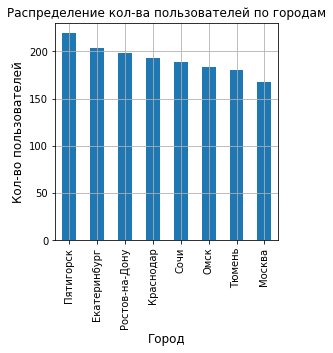

In [21]:
# частота распределения данных по городам
users.groupby('city')['city'].count().sort_values(ascending=False)\
.plot(kind='bar',title='Распределение кол-ва пользователей по городам',figsize=(4,4),grid=True);
plt.ylabel('Кол-во пользователей', fontsize=12);
plt.xlabel('Город', fontsize=12);

In [22]:
#частота в процентном выражении
round(users.groupby('city')['city'].count()*100/len(users['city']),).sort_values(ascending=False)

city
Пятигорск        14.00
Екатеринбург     13.00
Краснодар        13.00
Ростов-на-Дону   13.00
Омск             12.00
Сочи             12.00
Тюмень           12.00
Москва           11.00
Name: city, dtype: float64

Данные собраны из 8 городов: Тюмень, Омск, Москва, Ростов-на-Дону, Краснодар,Пятигорск,Екатеринбург,Сочи. Города в данных представлены примерно в одинаковом кол-ве пользователей, при этом максимальное кол-во - в Пятигорске(14%), минимальное - в Москве(11%).

### Соотношение пользователей с подпиской и без подписки

Оценим распределение кол-ва пользователей с подпиской и без: построим круговую диаграмму и оценим доли каждой группы

In [23]:
#функция для построения круговой диаграммы с подписью долей
def pie(data,column,title):
    data.groupby(column)[column].count()\
.plot(kind='pie',figsize=(4,4),grid=True,autopct='%.1f%%');
    plt.ylabel(' ', fontsize=10);
    plt.title(f'Распределение {title} с подпиской и без',fontsize=12)
    plt.xlabel('ultra - с подпиской, free - без подписки ', fontsize=10);

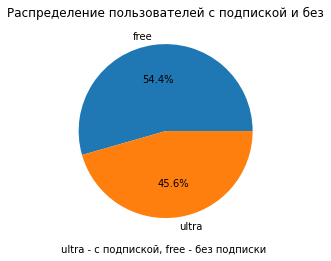

In [24]:
#выведем круговую диаграмму распеделения кол-ва пользователей с подпиской и без
pie(users,'subscription_type','пользователей')

Данные по пользователям с подпиской и без примерно одинаковое, без подписки - чуть больше (54%), чем с подпиской(46%)

### Возраст пользователей

Оценим распределение пользователей по возрасту (построим гистограмму), выведем статистику по столбцу и построим диаграмму размаха

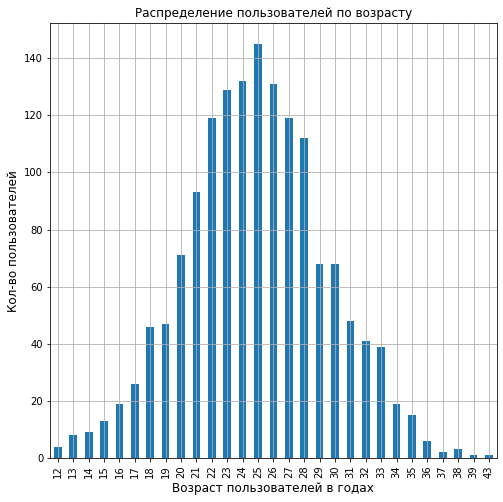

In [25]:
#столбчатая диаграмма распределения
users.groupby('age')['age'].count()\
.plot(kind='bar',title='Распределение пользователей по возрасту',figsize=(8,8),grid=True);
plt.ylabel('Кол-во пользователей', fontsize=12);
plt.xlabel('Возраст пользователей в годах', fontsize=12);

In [26]:
#вывод статистики по столбцу
users['age'].describe()

count   1,534.00
mean       24.90
std         4.57
min        12.00
25%        22.00
50%        25.00
75%        28.00
max        43.00
Name: age, dtype: float64

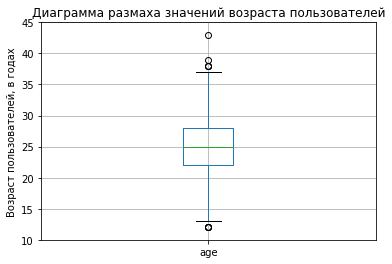

In [27]:
users.boxplot(column='age')
plt.ylim(10, 45)
plt.ylabel('Возраст пользователей, в годах', fontsize=10);
plt.title('Диаграмма размаха значений возраста пользователей',fontsize=12);

Возраст пользователей от 12 до 43 лет, половина данных приходится на возраст от 22 до 28 лет. Медиана приходится на 25 лет и практически равна среднему - распределение очень близко к симметричному, выбросами являются значения возраста 12 лет и 3 значения свыше 37 лет - 38, 39 и 43 года.

### Расстояние, которое пользователь преодолел за одну поездку

Выведем статистику по столбцу, гистограмму распределения и диаграмму размаха для оценки выбросов 

In [28]:
#вывод статистики по столбцу
round(rides['distance'].describe(),)

count   18,068.00
mean     3,071.00
std      1,117.00
min          1.00
25%      2,543.00
50%      3,134.00
75%      3,776.00
max      7,211.00
Name: distance, dtype: float64

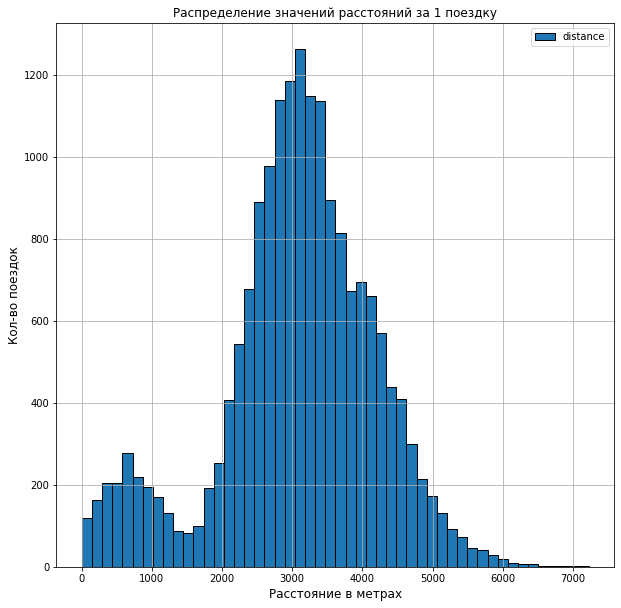

In [29]:
#выведем гистограмму 
rides.plot(y ='distance',title='Распределение значений расстояний за 1 поездку',\
          kind ='hist', ec='black', bins = 50, grid = True,figsize=(10,10),range = (1,7230));
plt.ylabel('Кол-во поездок', fontsize=12);
plt.xlabel('Расстояние в метрах', fontsize=12);

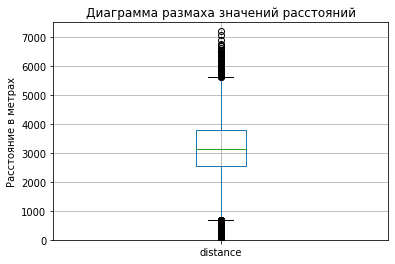

In [30]:
# выведем диаграмму размаха
rides.boxplot(column='distance')
plt.ylim(0, 7500)
plt.ylabel('Расстояние в метрах', fontsize=10);
plt.title('Диаграмма размаха значений расстояний',fontsize=12);

Расстояние в данных представлено диапазоном от 1 до 7 211 м, половина всех значений находятся в промежутке от 2 543 до 3 776 метров, медиана 3 134 м недалека от среднего 3 071 м. Выбросы находятся в пределах примерно до 700 метров и свыше 5500 метров

### Продолжительность поездок

Выведем статистику по столбцу, гистограмму распределения и диаграмму размаха для оценки выбросов

In [31]:
#вывод статистики по столбцу
round(rides['duration'].describe(),1)

count   18,068.00
mean        17.80
std          6.10
min          0.50
25%         13.60
50%         17.70
75%         21.70
max         40.80
Name: duration, dtype: float64

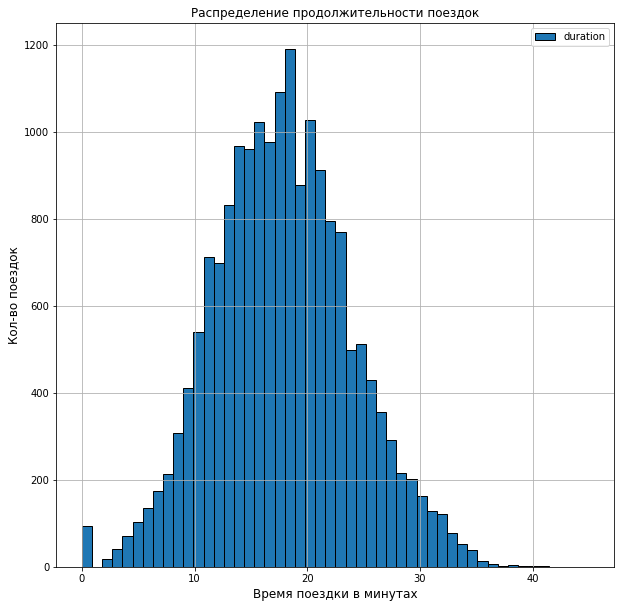

In [32]:
#выведем гистограмму 
rides.plot(y ='duration',title='Распределение продолжительности поездок',\
          kind ='hist', ec='black', bins = 50, grid = True,figsize=(10,10),range = (0,45));
plt.ylabel('Кол-во поездок', fontsize=12);
plt.xlabel('Время поездки в минутах', fontsize=12);

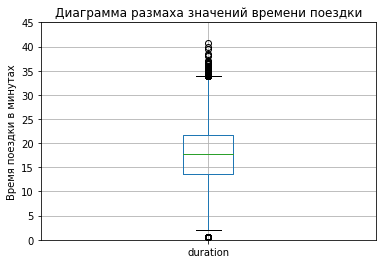

In [33]:
# выведем диаграмму размаха
rides.boxplot(column='duration')
plt.ylim(0, 45)
plt.ylabel('Время поездки в минутах', fontsize=10);
plt.title('Диаграмма размаха значений времени поездки',fontsize=12);

Продолжительность поездок в интервале от полуминуты до 41 минуты, более половины в интервале от 14 до 22 минут. Медиана и среднее практически совпадают (около 18 минут), распределение значений приближено к симметричному. Выбросами являются значения менее 2-х минут и свыше 34 минут

**Вывод по шагу 2**:

Исследовательский анализ данных показал следующее:
 - Данные собраны их 8 городов: Тюмень, Омск, Москва, Ростов-на-Дону, Краснодар,Пятигорск,Екатеринбург,Сочи. Города в данных представлены примерно в одинаковом кол-ве пользователей, при этом максимальное кол-во - в Пятигорске(14%), минимальное - в Москве(11%).
 - Данные по пользователям с подпиской и без примерно одинаковое, без подписки - чуть больше (54%), чем с подпиской(46%).
 - Возраст пользователей от 12 до 43 лет, половина данных приходится на возраст от 22 до 28 лет. Медиана приходится на 25 лет и практически равна среднему - распределение очень близко к симметричному, выбросами являются значения возраста 12 лет  и 3 значения свыше 37 лет - 38, 39 и 43 года.
 - Расстояние в данных представлено диапазоном от 1 до 7 211 м, половина всех значений находятся в промежутке от 2 543 до 3 776 метров, медиана 3 134 м недалека от среднего 3 071 м. Выбросы находятся в пределах примерно до 700 метров и свыше 5500 метров.
 - Продолжительность поездок в интервале от полуминуты до 41 минуты, более половины в интервале от 14 до 22 минут. Медиана и среднее практически совпадают (около 18 минут), распределение значений приближено к симметричному. Выбросами являются значения менее 2-х минут и свыше 34 минут.


## Объединение данных

### Объединение всех данных в один файл

Объединим данные из всех 3-х файлов в один датафрейм с названием data и выведем 5 любых строк этого датафрейма для проверки

In [34]:
# присвоим датафрейму users название data
data = users
# объединим данные по пользователям и поездкам
data = data.merge(rides, on=['user_id'], how='outer')
# далее объединим с подписками
data = data.merge(subscriptions, on=['subscription_type'],how='outer')
# выведем 5 любых строк нового датафрейма
data.sample(5)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6019,645,Олеся,36,Краснодар,ultra,"2,560.00",10.10,2021-01-25,1,6,0,199
15860,1380,Михаил,26,Омск,free,"2,683.00",9.70,2021-11-25,11,8,50,0
4744,511,Тамерлан,24,Екатеринбург,ultra,"3,401.00",23.70,2021-03-25,3,6,0,199
13324,1199,Константин,18,Пятигорск,free,"3,372.00",20.20,2021-11-11,11,8,50,0
5664,604,Лидия,32,Сочи,ultra,"2,936.00",16.70,2021-06-25,6,6,0,199


Данные были успешно объединены, все столбцы вошли, данным с типом подписки соответствуют корректные данные о стоимостях. Индексация должна соответствовать индексации той таблицы, в которой было больше всего строк - таблице о поездках.

Посмотрим общую информацию о полученном датафрейме

In [35]:
# выведем информацию о полученном датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


Кол-во строк 18068 ( как было в таблице с самым большим кол-вом строк - о поездках), типы данных корректные, пропуски отсутствуют.

### Разделение данных с учетом наличия подписки

Создадим 2 отдельных датафрейма на пользователей с подпиской и без (соответственно data_yes и  data_no).
Выведем по 5 любых строк каждого датафрейма для проверки корректности распределения - с подпиской и без подписки

In [36]:
# создадим таблицу с пользователями с подпиской
data_yes = data.query('subscription_type=="ultra"')
data_yes.sample(5)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
2544,270,Егор,26,Тюмень,ultra,"4,151.00",14.20,2021-01-08,1,6,0,199
6050,649,София,34,Пятигорск,ultra,"3,931.00",34.60,2021-06-14,6,6,0,199
3060,328,Данил,35,Пятигорск,ultra,"2,971.00",11.10,2021-08-03,8,6,0,199
3228,349,Федор,25,Сочи,ultra,"3,544.00",18.80,2021-05-07,5,6,0,199
6186,663,Евгения,24,Москва,ultra,"2,994.00",12.40,2021-12-24,12,6,0,199


In [37]:
# создадим таблицу с пользователями без подписки
data_no = data.query('subscription_type=="free"')
data_no.sample(5)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
14442,1275,Виталина,26,Тюмень,free,"3,015.00",18.20,2021-06-21,6,8,50,0
14112,1252,Нелли,31,Краснодар,free,"3,063.00",16.00,2021-10-08,10,8,50,0
15735,1372,Святослав,28,Краснодар,free,"3,060.00",21.50,2021-04-20,4,8,50,0
17268,1478,Роберт,21,Пятигорск,free,"2,117.00",13.80,2021-12-30,12,8,50,0
13974,1243,Эдуард,31,Москва,free,"3,826.00",20.70,2021-04-07,4,8,50,0


Таблицы созданы корректно

### Информация о расстоянии и времени поездок для пользователей обеих категорий

Проанализируем расстояние  для пользователей с подпиской и без подписки: постороим график распределения расстояния и диаграмму размаха, а также выведем статистику расстояния

In [38]:
# функция для построения гистаграммы двух таблиц на одном графике
def plots(column,range,xlabel,title):
    
    ax = data_yes.plot(
     kind='hist',
     y=column,
     histtype='step',
     range=range,
     bins=50,
     linewidth=5,
     alpha=0.7,
     label='для пользователей с подпиской',
     );
    
    data_no.plot(
     kind='hist',
     y=column,
     histtype='step',
     range=range,
     bins=50,
     linewidth=5,
     alpha=0.7,
     label='для пользователей без подписки',
     ax=ax,
     grid=True,
     legend=True,
      );
    plt.ylabel('Кол-во поездок', fontsize=12);
    plt.xlabel(xlabel, fontsize=12);
    plt.title(title,fontsize=12);

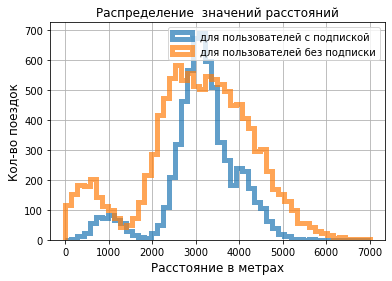

In [39]:
# построим гистаграмму двух таблиц на одном графике
plots('distance',(0, 7000),'Расстояние в метрах','Распределение  значений расстояний')

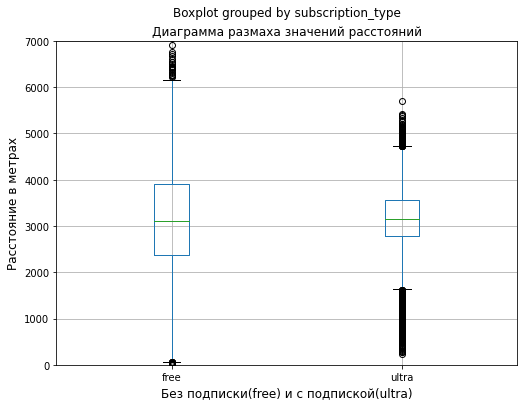

In [40]:
# построим диаграмму размаха на одном графике
data.boxplot('distance', by='subscription_type', figsize=(8,6))
plt.ylim(0,7000)
plt.ylabel('Расстояние в метрах', fontsize=12);
plt.xlabel('Без подписки(free) и с подпиской(ultra)', fontsize=12);
plt.title('Диаграмма размаха значений расстояний');

Выведем статистику расстояний для пользователей с подпиской и без подписки

In [41]:
#создадим список метрик статистики describe
metr = ['count','mean','std','min','25%','50%','75%','max']

#функция для объединения статистики по значению в разрезе  "с подпиской и без" в одну таблицу
def dataframe(column):
    describe = pd.DataFrame(zip(metr,round(data_yes[column].describe(),),\
                            round(data_no[column].describe(),)),\
            columns=['metrics','Ultra','Free'])
    return describe

In [42]:
#выведем статистику по подписанным и неподписанным пользователям в разрезе расстояний
dataframe('distance')

,metrics,Ultra,Free
0,count,"6,500.00","11,568.00"
1,mean,"3,115.00","3,045.00"
2,std,837.00,"1,246.00"
3,min,244.00,1.00
4,25%,"2,785.00","2,367.00"
5,50%,"3,149.00","3,115.00"
6,75%,"3,561.00","3,906.00"
7,max,"5,700.00","7,211.00"


На основании 2-х графиков и статистики можно утверждать следующее:
 - по площади гистограммы видно, что кол-во значений расстояний в целом выше у пользователей без подписки, за исключением интервала расстояния от 2800 до примерно 3300 метров - в этом интервале преобладают поездки пользователей с подпиской. Разница в большем кол-ве значений пользователей без подписки может быть связано как с их большим кол-вом в данных (54% от всех данных о пользователях), так и в большем кол-ве поездок пользователей без подписки (проверим далее)
 - размах значений расстояний у пользователей без подписки шире: не считая выбросов, значения нахдятся в интервале от 0 до примерно 6200 м, в то время как с подпиской - в интервале от 1600 до 4700 м.
 - из-за выбросов среднее двух категорий различаются более существенно (с подпиской - 3115, без - 3045 метров), чем медианы расстояний (3148 и 3114 м соответственно).
 
Посчитаем кол-во поездок пользователей с подпиской и без в процентах 

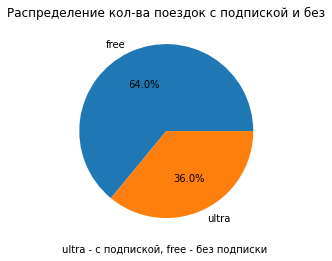

In [43]:
pie(data,'subscription_type','кол-ва поездок')

Мы видим, что кол-во поездок без подписки почти в 2 раза превышает кол-во поездок с подпиской, вследствие чего при сопоставимых расстояниях поездки площадь распределения расстояний пользователей без подписки на гистограмме больше, чем пользователей с подпиской.


Аналогично проанализируем продолжительность поездок для пользователей с подпиской и без подписки: постороим график распределения расстояния и диаграмму размаха, а также выведем статистику расстояния 

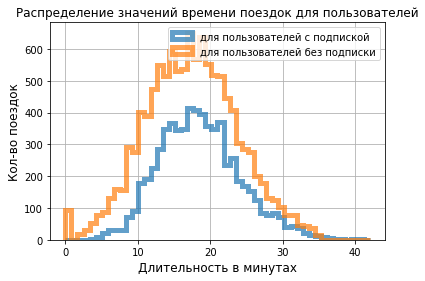

In [44]:
# построим гистаграмму двух таблиц на одном графике
plots('duration',(0, 42),'Длительность в минутах','Распределение значений времени поездок для пользователей')

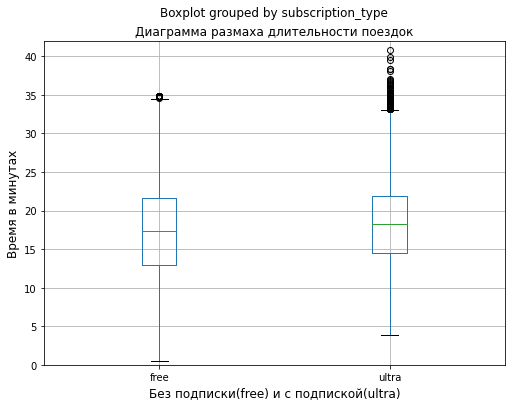

In [45]:
# построим диаграмму размаха на одном графике
data.boxplot('duration', by='subscription_type', figsize=(8,6))
plt.ylim(0,42);
plt.ylabel('Время в минутах', fontsize=12);
plt.xlabel('Без подписки(free) и с подпиской(ultra)', fontsize=12);
plt.title('Диаграмма размаха длительности поездок');

In [46]:
#выведем статистику длительности поездок для пользователей с подпиской и без
dataframe('duration')

,metrics,Ultra,Free
0,count,"6,500.00","11,568.00"
1,mean,19.00,17.00
2,std,6.00,6.00
3,min,4.00,0.00
4,25%,14.00,13.00
5,50%,18.00,17.00
6,75%,22.00,22.00
7,max,41.00,35.00


На основании 2-х графиков и статистики можно утверждать следующее:
 - гистограмма: как мы уже выяснили выше, кол-во поездок пользователей без подписки составляет почти 2/3,
 - размах значений у пользователей без подписки также немного шире: не считая выбросов, значения находятся в интервале от 0 до примерно 35 минут, в то время как с подпиской - в интервале от 4 до 33 минут.
 - при этом среднее и медиана времени для пользователей с подпиской и без примерно расходятся примерно на 1 минуту:18 - 18,5 и 17 минут соответственно.

**Вывод по шагу 4**:

Данные из 3-х файлов с пользователями, поездками и тарифами объединены в один файл.

Для анализа возможных различий в проезжаемых пользователями расстояниях и длительности поездок данный файл был разделе на 2 файла - файл с данными о пользователях с подпиской и файл с пользователями без подписок. Напомним, что пользователей без подписки - 54%, с подпиской - 46%. Анализ данных файл показал следующее:

1)Расстояние:
 - кол-во значений расстояний, а соответственно, поездок, в целом выше у пользователей без подписки, за исключением интервала расстояния от 2800 до примерно 3300 метров - в этом интервале преобладают поездки пользователей с подпиской. Разница в большем кол-ве значений пользователей без подписки связано как с их большим кол-вом в данных (54% от всех данных о пользователях), так и в большем кол-ве поездок пользователей без подписки (чуть менее 2/3 всех поездок - поездки пользователей без подписки)
 - размах значений расстояний у пользователей без подписки шире: не считая выбросов, значения нахдятся в интервале от 0 до примерно 6200 м, в то время как с подпиской - в интервале от 1600 до 4700 м.
 - из-за выбросов среднее двух категорий различаются более существенно (с подпиской - 3115, без - 3045 метров), чем медианы расстояний (3148 и 3114 м соответственно).
 
2)Продолжительность поездок:
 - размах значений у пользователей без подписки немного шире: не считая выбросов, значения находятся в интервале от 0 до примерно 35 минут, в то время как с подпиской - в интервале от 4 до 33 минут.
 - при этом среднее и медиана времени для пользователей с подпиской и без  расходятся примерно на 1 минуту:18 - 18,5 и 17 минуты соответственно.

## Подсчёт выручки

### Агрегированные данные по каждому пользователю

Посчитаем совокупную длительность, кол-во и время поездок для каждого пользователя - создадим отдельную таблицу data_user и выведем первые 10 строк этой таблицы.
Кроме столбцов из исходной таблицы, в ней будут новые столбцы: rides_count - кол-во поездок,distance_sum - сумма всех расстояний, duration_round_sum - совокупная округленная длительность всех поездок.
До этого предварительно создадим еще один столбец duration_round в исходном датафрейме data с округленной в большую сторону продолжительностью каждой поездки

In [47]:
#создадим столбец в исходной таблице с округленным в большую сторону значением каждой поездки
data['duration_round'] = np.ceil(data['duration'])
#создадим сводную таблицу, сгруппированную 
data_user = data.groupby(['user_id','month','subscription_type','minute_price',\
                          'start_ride_price','subscription_fee'])\
                         .agg({'distance':['sum','count'],'duration_round':'sum'}).reset_index()
#поименуем столбцы этой таблицы
data_user.columns=['user_id','month','subscription_type','minute_price','start_ride_price','subscription_fee',\
                   'distance_sum','rides_count','duration_round_sum']
data_user.head(10)

,user_id,month,subscription_type,minute_price,start_ride_price,subscription_fee,distance_sum,rides_count,duration_round_sum
0,1,1,ultra,6,0,199,"7,028.00",2,42.00
1,1,4,ultra,6,0,199,754.00,1,7.00
2,1,8,ultra,6,0,199,"6,724.00",2,46.00
3,1,10,ultra,6,0,199,"5,810.00",2,32.00
4,1,11,ultra,6,0,199,"7,004.00",3,55.00
5,1,12,ultra,6,0,199,"6,752.00",2,28.00
6,2,3,ultra,6,0,199,"10,188.00",3,63.00
7,2,4,ultra,6,0,199,"6,165.00",2,40.00
8,2,6,ultra,6,0,199,"3,255.00",1,14.00
9,2,7,ultra,6,0,199,"6,781.00",2,47.00


### Агрегированные данные по каждому пользователю с выручкой

Необходимо добавить столбец с помесячной выручкой, которую принёс каждый пользователь. 

Вспомним, что условия по оплате следующие:
 - без подписки:
   - абонентская плата отсутствует;
   - стоимость одной минуты поездки — 8 рублей;
   - стоимость старта (начала поездки) — 50 рублей;
 - с подпиской Ultra:
   - абонентская плата — 199 рублей в месяц;
   - стоимость одной минуты поездки — 6 рублей;
   - стоимость старта — бесплатно.
   
Т.о. расчет выручки для каждого пользователя в месяц будет следующий:
 - без подписки: это сумма, которая складывается из  кол-ва поездок (столбец rides_count), умноженного на 50 руб.  и общей округленной длительности поездки(столбец duration_round_sum), умноженной на 8 руб.;
 - с подпиской Ultra: это сумма, которая складывается из абонентской платы умноженной и общей округленной длительности поездки,умноженной на 6 руб.
 

Рассчитаем общую выручку по каждому пользователю в зависимости от типа подписки

In [48]:
#создадим столбец с расчетом выручки
data_user['revenue'] = data_user['minute_price']* data_user['duration_round_sum'] \
                     + data_user['start_ride_price']*data_user['rides_count']\
                     + data_user['subscription_fee']
#выведем 5 любых строк обновленной таблицы
data_user.sample(5)

,user_id,month,subscription_type,minute_price,start_ride_price,subscription_fee,distance_sum,rides_count,duration_round_sum,revenue
41,7,1,ultra,6,0,199,"6,478.00",2,28.00,367.00
5426,813,8,free,8,50,0,241.00,1,8.00,114.00
10102,1386,7,free,8,50,0,"8,662.00",2,30.00,340.00
9526,1314,8,free,8,50,0,"3,418.00",2,34.00,372.00
9320,1288,2,free,8,50,0,"9,106.00",3,54.00,582.00


Мы получили таблицу с агрегированными данными по месяцам по каждому пользователю о кол-ве поездок, общей длительности всех поездок, совокупном расстоянии и полученной выручке от каждого пользователя в месяц.
 
Посчитаем долю выручки от подписанных пользователей и без подписки за все время: 

In [49]:
data_user.groupby('subscription_type')['revenue'].sum() * 100/ data_user['revenue'].sum()

subscription_type
free    57.58
ultra   42.42
Name: revenue, dtype: float64

Несмотря на то, что пользователи без подписки формируют почти 2/3 всех поездок (64%) доля выручки от них меньше: возможно они совершают менее длительные поездки, чем "подписанные" пользователи (проверим данную гипотезу далее). 

**Вывод по шагу 5**:

Мы получили агрегированные данные по каждому пользователю с общим кол-вом поездок, суммарным расстоянием и длительностью поездок и полученной от него выручкой. Доля выручки пользователей с подпиской и без составляют 42 и 58% соответственно, причем, несмотря на то, что пользователи без подписки формируют почти 2/3 всех поездок (64%) доля выручки от них меньше доли кол-ва поездок: возможно они совершают менее длительные поездки, чем "подписанные" пользователи (проверим данную гипотезу далее). 

## Проверка гипотез

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.

### Гипотеза о времени поездки

Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверим гипотезу, используя исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

Сформулируем гипотезы:
- Н0:длительность поездок пользователей с подпиской такая же как у "неподписанных" пользователей,
- Н1:длительность поездок пользователей с подпиской выше, чем у "неподписанных" пользователей.

Для проверки гипотез будем использовать двухвыборочный t-тест для независимых выборок: дисперсии выборок будем считать не равными ( статистика данных пользователей с подпиской и без из пункта 4.3 показала существенное отличие стандартного отклонения по двум категориям пользователей - почти в 1 минуту)

In [50]:
a = data_yes['duration']
f'Среднее время поездки пользователя с подпиской:{round(a.mean(),1)} минут'

'Среднее время поездки пользователя с подпиской:18.5 минут'

In [51]:
b = data_no['duration']
f'Среднее время поездки пользователя без подписки:{round(b.mean(),1)} минут'

'Среднее время поездки пользователя без подписки:17.4 минут'

In [52]:
#установим уровень стат значимости на уровне 5%
alpha = 0.05
# используем двухвыборочный t-тест для независимых выборок
results = st.ttest_ind(a,b,equal_var=False,alternative='greater')
# выведем полученное значение p-value
'р-значение:', results.pvalue

('р-значение:', 5.96655027721321e-37)

In [53]:
#вывод об отвержении или неотвержении нулевой гипотезы
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Отвергаем нулевую гипотезу


Гипотеза о равенстве длительности поездок пользователей с подпиской и без отвергнута, в т.ч. по средним знаениям мы видим, что длительность поездок пользователей с подпиской выше, чем без подписки. Т.о.можно сказать, что пользователи с подпиской тратят больше времени на поездки и  могут быть «выгодными» для компании.

### Гипотеза о расстоянии одной поездки

Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверим гипотезу и сделаем выводы.

Сформулируем гипотезы:
- Н0:расстояние одной поездки пользователей с подпиской равно 3130 метров,
- Н1:расстояние одной поездки пользователей с подпиской больше 3130 метров.

Для проверки гипотез будем использовать одновыборочный t-тест

In [54]:
a = data_yes['distance']
#установим уровень стат значимости на уровне 5%
alpha = 0.05
# используем одновыборочный t-тест
results = st.ttest_1samp(a, popmean=3130,alternative='greater')
# выведем полученное значение p-value
'р-значение:', results.pvalue

('р-значение:', 0.9195649894697724)

In [55]:
#вывод об отвержении или неотвержении нулевой гипотезы
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Не получилось отвергнуть нулевую гипотезу


In [56]:
f'Среднее расстояние,которое проезжают пользователи с подпиской:{round(a.mean(),)} метров'

'Среднее расстояние,которое проезжают пользователи с подпиской:3115 метров'

Т.о. можно сказать, что среднее расстояние, которое проезжают пользователи с подпиской приближается к  3130, а значит не превышает его. В т.ч. нулевая гипотеза подтверждается тем, что среднее расстояние,которое проезжают пользователи с подпиской, равно 3115 метров. Исходя, из износостройкости самокатов, среднее расстояние поездок пользователей с подпиской является оптимальным.

### Гипотеза о помесячной выручке

Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделаем вывод

Сформулируем гипотезы:

 - Н0:помесячная выручка от пользователей с подпиской такая же как у "неподписанных" пользователей,
 - Н1:помесячная выручка от пользователей с подпиской выше, чем у "неподписанных" пользователей.

Для проверки гипотез будем использовать двухвыборочный t-тест для независимых выборок

In [57]:
a = data_user.query('subscription_type=="ultra"')
a = a['revenue']
f'Средняя месячная выручка от пользователя с подпиской:{round(a.mean(),)} рублей'

'Средняя месячная выручка от пользователя с подпиской:362 рублей'

In [58]:
b = data_user.query('subscription_type=="free"')
b = b['revenue']
f'Средняя месячная выручка от пользователя без подписки:{round(b.mean(),)} рублей'

'Средняя месячная выручка от пользователя без подписки:328 рублей'

In [59]:
#установим уровень стат значимости на уровне 5%
alpha = 0.05
# используем двухвыборочный t-тест для независимых выборок
results = st.ttest_ind(a,b,alternative='greater')
# выведем полученное значение p-value
'р-значение:', results.pvalue

('р-значение:', 5.015631474144602e-32)

In [60]:
#вывод об отвержении или неотвержении нулевой гипотезы
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Отвергаем нулевую гипотезу


Гипотеза о равенстве помесячной выручки пользователей с подпиской и без отвергнута, в т.ч. по средним знаениям мы видим, что среднемесячная выручка "подписанных" пользователей выше, чем "неподписанных". Т.о. можно сказать, что пользователи с подпиской являются более "выгодными" с точки зрения доходности.

### Гипотеза о количестве обращений в техподдержку

Вопрос: 
- Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Ответ:
 - Поскольку это будут две зависимые выборки, то потребуется проверка гипотезы о равенстве среднего значения генеральной совокупности до и после изменения. Чтобы проверить данную гипотезу понадобится двухвыборочный t-тест для зависимых выборок. Применим метод scipy.stats.ttest_rel() с проверкой левосторонней альтернативной гипотезой 

**Вывод по шагу 6**:

Проведена проверка ряда гипотез, получены следующие выводы:
 - пользователи с подпиской тратят больше времени на поездки и  могут быть более «выгодными» для компании, чем пользователи без подписки.
 - можно сказать, что среднее расстояние, которое проезжают пользователи с подпиской, приближается к 3130 м, т.е не превышает 3130. Исходя, из износостройкости самокатов, среднее расстояние поездок пользователей с подпиской является оптимальным.
 - среднемесячная выручка "подписанных" пользователей выше, чем "неподписанных". Т.о. можно сказать, что пользователи с подпиской являются более "выгодными" с точки зрения доходности.
  
По совокупности проведенной работы можно утверждать, что перспективным направлением развития сервиса аренды самокатов GoFast является увеличение числа "подписанных" пользователей, поскольку данная категория является наиболее доходной ( подтверждается помесячной выручкой и более длительными поездками по сравнению с пользователями без подписки) и оптимальной с т.з. износостойкости самокатов. База для развития данного направления является достаточно емкой даже без учета привлечения новых клиентов: доля неподписанных пользователей составляет 54%, причем они формируют практически 2/3 всех поездок(64%).  

## Общий вывод

Переданы данные популярного сервиса аренды самокатов GoFast о некоторых пользователях из нескольких городов, а также об их поездках.Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться как с подпиской, так и без. 

Перед анализом данных была проведена работа по анализу пропусков и дубликатов (были удалены 31 дубликат в файле с пользователями), изменению типов данных. Данные предоставлены без указания мобильных номеров, дубликаты могли быть получены вследствие регистрации одного и того же пользователя, но с разными номерами телефона. В противном случае, требуется доработка приложения, чтобы исключить возможность одного и того же пользователя регистрироваться несколько раз. 

Данные характеризуются следующим:
 - Данные по пользователям с подпиской и без примерно одинаковое, без подписки - чуть больше (54%), чем с подпиской(46%).
 - Возраст пользователей от 12 до 43 лет, половина данных приходится на возраст от 22 до 28 лет. Медиана приходится на 25 лет и практически равна среднему - распределение очень близко к симметричному, выбросами являются значения возраста 12 лет и 3 значения свыше 37 лет - 38, 39 и 43 года.
 - Расстояние в данных представлено диапазоном от 1 до 7 211 м, половина всех значений находятся в промежутке от 2 543 до 3 776 метров, медиана 3 134 м недалека от среднего 3 071 м. Выбросы находятся в пределах примерно до 700 метров и свыше 5500 метров.
 - Продолжительность поездок в интервале от полуминуты до 41 минуты, более половины в интервале от 14 до 22 минут.  Медиана и среднее практически совпадают (около 18 минут), распределение значений приближено к симметричному. Выбросами являются значения менее 2-х минут и свыше 34 минут.
 
Анализ данных о расстояние и длительности поездок в зависимости от того, имеет ли пользователь подписку или нет показал следующее:

1)Расстояние:
 - кол-во значений расстояний, а соответственно, поездок, в целом выше у пользователей без подписки, за исключением интервала расстояния от 2800 до примерно 3300 метров - в этом интервале преобладают поездки пользователей с подпиской. Разница в большем кол-ве значений пользователей без подписки связано как с их большим кол-вом в данных (54% от всех данных о пользователях), так и в большем кол-ве поездок пользователей без подписки (чуть менее 2/3 всех поездок - поездки пользователей без подписки)
 - размах значений расстояний у пользователей без подписки шире: не считая выбросов, значения нахдятся в интервале от 0 до примерно 6200 м, в то время как с подпиской - в интервале от 1600 до 4700 м.
 - из-за выбросов среднее двух категорий различаются более существенно (с подпиской - 3115, без - 3045 метров), чем медианы расстояний (3148 и 3114 м соответственно).

2)Продолжительность поездок:
 - размах значений у пользователей без подписки немного шире: не считая выбросов, значения находятся в интервале от 0 до примерно 35 минут, в то время как с подпиской - в интервале от 4 до 33 минут.
 - при этом среднее и медиана времени для пользователей с подпиской и без расходятся примерно на 1 минуту:18 - 18,5 и 17 минут соответственно.

Доля выручки пользователей с подпиской и без составляют 42 и 58% соответственно, причем, несмотря на то, что пользователи без подписки формируют почти 2/3 всех поездок (64%) доля выручки от них меньше доли кол-ва поездок, т.к. они совершают менее длительные поездки, чем "подписанные" пользователи (см. далее).

Проверен ряд гипотез о длительности поездок, расстоянии пользователей с подпиской и без, выручке, полученной от «подписанных» пользователей, получены следующие выводы:
 - пользователи с подпиской тратят больше времени на поездки и  могут быть более «выгодными» для компании, чем пользователи без подписки.
 - можно сказать, что среднее расстояние, которое проезжают пользователи с подпиской, приближается к 3130 м, т.е не превышает 3130. Исходя, из износостройкости самокатов, среднее расстояние поездок пользователей с подпиской является оптимальным.
 - среднемесячная выручка "подписанных" пользователей выше, чем "неподписанных". Т.о. можно сказать, что пользователи с подпиской являются более "выгодными" с точки зрения доходности.

По совокупности проведенной работы можно утверждать, что перспективным направлением развития сервиса аренды самокатов GoFast является увеличение числа "подписанных" пользователей, поскольку данная категория является наиболее доходной ( подтверждается помесячной выручкой и более длительными поездками по сравнению с пользователями без подписки) и оптимальной с т.з. износостойкости самокатов. База для развития данного направления является достаточно емкой даже без учета привлечения новых клиентов: доля неподписанных пользователей составляет 54%, причем они формируют практически 2/3 всех поездок(64%). Например, для привлечения действующих клиентов использовать подписку можно использовать промоакции по  15-ти днейной/одномесячной подписке, по завершении периода действия этой подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж


## Распределения

### Акция с раздачей промокодов

Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 

Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 
10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. 

Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

Данное распределение является биномиальным с вероятность получить успех-10%, неуспех, соответственно, 90%.
Построим график распределения для n = 1000

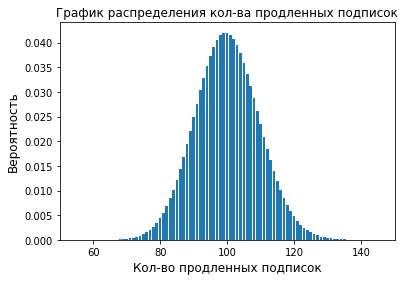

In [61]:
from scipy.stats import binom

n = 1000 # количество попыток
p = 0.1 # вероятность успеха

distr = []

for k in range(0, n + 1):
    value = binom.pmf(k, n, p)
    distr.append(value)
    
    
plt.bar(range(0, n + 1), distr);
plt.xlim(50,150);
plt.ylabel('Вероятность', fontsize=12);
plt.xlabel('Кол-во продленных подписок', fontsize=12);
plt.title('График распределения кол-ва продленных подписок',fontsize=12);

График показывает, что вероятность получить от 100 продлений при количестве промокодов 1000 с вероятностью продления подписки 10% - около 50%, нам же нужна вероятность не менее 95%.Т.о., нужно увеличить кол-во промокодов.

Для подбора приведем наше распределение к параметрам нормального для использования метода cdf(). Вероятность получить менее 100 продлений должна быть не больше 5%, соответственно получить больше - 95%: подберем минимальное значение n, при котором значение result будет наиболее близко к 95%.

In [62]:
from math import sqrt

n = 1169  
p = 0.1

# рассчитаем параметры с заданным кол-вом и вероятностью для нормального распределения
mu = n*p 
sigma = sqrt(n * p * (1 - p))
# зададим нормальное распределение
distr = st.norm(mu, sigma)
# найдите вероятность
result = 1-distr.cdf(100)
# выведем вероятность в процентах
result

0.9502851068730583

Т.о., минимальное количество промокодов, чтобы вероятность не выполнить план была примерно 5 %, составляет 1169 промокодов.

### Push-уведомления в мобильном приложении.

Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 
1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.


Сначала посчитаем вероятность, что уведомление откроют не более 399,5 тыс. пользователей:
 - данное распределение является биномиальным с вероятностью успеха 40%, неуспеха - 60%,
 - приведем наше распределение к нормальному для подсчета вероятности получения менее определенного кол-ва успехов методом cdf().

In [63]:
from math import sqrt

n = 1000000  
p = 0.4

# рассчитаем параметры с заданным кол-вом и вероятностью для нормального распределения
mu = n*p 
sigma = sqrt(n * p * (1 - p))
# зададим нормальное распределение
distr = st.norm(mu, sigma)
# найдите вероятность
result = distr.cdf(399500)
# выведем вероятность в процентах
round(result*100,1)

15.4

Такая вероятность составляет 15.4%.

Аппроксимируем наше распределение нормальным, построим примерный график распределения для n = 100 и проверим - выполняется ли наше условие аппроксимации (лежит ли mu ± 3 sigma в промежутке от 0 до n).

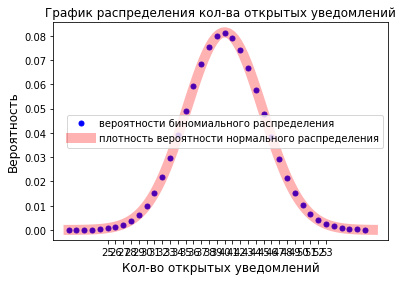

Условие выполняется


In [64]:
# зададим функцию, которая выдаёт <num> чисел,
# равномерно распределённых от <start> до <stop>
# (понадобится для визуализации нормального распределения)
def linspace(start, stop, num):
    step = (stop - start) / (num - 1)
    result = []
    for i in range(num):
        result.append(start + step * i)
    return result
 
# задаём параметры биномиального распределения
n = 100
p = 0.4

# границы промежутка, в котором будем строить аппроксимацию -
# от n*p минус 4 ст.отклонения бином.распределения
# до n*p плюс 4 ст.отклонения бином.распределения
# (там, где вероятности значений почти не равны нулю)
left = int(n * p - 4 * sqrt(n * p * (1 - p)))
right = int(n * p + 4 * sqrt(n * p * (1 - p)))


# зададим набор значений биномиальной величины на выбранном промежутке:
# все неотрицательные целые числа от left до right
x = list(range(max(0, left), right))
# рисуем график биномиального распределения
ax = plt.subplot()
# используем синие о-образные маркеры и размер маркера 5
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=5,\
        label='вероятности биномиального распределения')
plt.ylabel('Вероятность', fontsize=12);
plt.xlabel('Кол-во открытых уведомлений', fontsize=12);
plt.title('График распределения кол-ва открытых уведомлений',fontsize=12);

# зададим мат.ожидание и ст.отклонение нормального распределения равными
# мат.ожиданию и ст.отклонению биномиального распределения
mu = n * p
sigma = sqrt(n * p * (1 - p))
 
# рисуем график нормального распределения:
# получим список из 100 чисел от left до right
x = linspace(left, right, 100)
# используем красную линию ширины 3 и прозрачности 0.3
ax.plot(x, st.norm.pdf(x, mu, sigma), 'r-', lw=10, alpha=0.3,\
        label='плотность вероятности нормального распределения')
 
# зададим подписи по оси x в пределах ± 3 ст.отклонений от мат.ожидания
# (последний аргумент в методе range - интервал между подписями)
x_ticks = list(range(int(mu - 3 * sigma), int(mu + 3 * sigma), 1))
ax.set_xticks(x_ticks)

# настраиваем оптимальное расположение легенды и выводим график
ax.legend(loc='best')
plt.show()
# выводим, выполняется ли наше условие аппроксимации:
# лежит ли mu ± 3 sigma в промежутке от 0 до n:
if (mu - (3 * sigma) >= 0) and ((mu + (3 * sigma) <= n)):
    print('Условие выполняется')
else:
    print('Условие не выполняется')

Т.о.: 

1)график построен, 

2)при рассылке 1 млн уведомлений вероятность того, что уведомление откроют не более 399,5 тыс. пользователей - около 15,4%.